In [258]:
import numpy as np 
import pandas as pd

In [259]:
import os
for dirname, _, filenames in os.walk('C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT\GlobalLandTemperaturesByCity.csv
C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT\GlobalLandTemperaturesByCountry.csv
C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT\GlobalLandTemperaturesByMajorCity.csv
C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT\GlobalLandTemperaturesByState.csv
C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT\GlobalTemperatures.csv
C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT\historical_emissions_csv.csv
C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT\Human Development Index_csv.csv
C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT\world_population_csv.csv


In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
#%pip install  chart_studio
# Plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
#%pip install  colorlover
import colorlover as cl
from plotly.subplots import make_subplots


import plotly.offline as pyol
pyol.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

#%pip install  pycountry
import pycountry
#%pip install  geopandas
import geopandas

print("all ok")

all ok


In [261]:
# At what point in history did Global Warming started increasing? Is C02 emmisions a factor for Global Warming?
#cleaning data, checking for null values, changing dt column to date format and grouping df by year           
    
    # Read the data
df = pd.read_csv("C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT/GlobalTemperatures.csv")
#print(df.head())
        # Make a copy of the data for future graphs
copy = df.copy()
        #print(copy.shape) --> (3192 rows, 9 columns) (GlobalTemperatures)
        #dropping null values
#0 or ‘index’ : Drop rows which contain missing values.
df.dropna(axis = 0, inplace = True)

df['Date'] = pd.to_datetime(df.dt)

global_temperatures_df = df.copy() # create a new dataset
global_temperatures_df.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column
# print(global_temperatures_df.head())

        # Creating new features
global_temperatures_df['day'] = global_temperatures_df['Date'].dt.day
global_temperatures_df['week'] = global_temperatures_df['Date'].dt.week
global_temperatures_df['month'] = global_temperatures_df['Date'].dt.month
global_temperatures_df['year'] = global_temperatures_df['Date'].dt.year

#print(global_temperatures_df['week'].value_counts())
#print(global_temperatures_df.head())
        # Only taking yearly data because some dates are missing
earth_df = global_temperatures_df.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

        #1975 is where earth's temperature suddenly starting increasing at an alarming rate
earth_df['turnpoint'] = np.where(earth_df['year'] <= 1975, 'before', 'after') # creating a new columns
earth_df.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,turnpoint
0,1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167,before
1,1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083,before
2,1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417,before
3,1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833,before
4,1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417,before


In [262]:
    #finding out relation between uncertainity of our data and recorded temperature during that time
    # Creating the dataset - using copy
copy['Date'] = pd.to_datetime(copy.dt)
copy['year'] = copy['Date'].dt.year
land_avg = copy.groupby('year')['LandAverageTemperature', 'LandAverageTemperatureUncertainty'].mean().reset_index()

        # Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2010", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
        
    #keeping axes color as tan
fig.update_xaxes(showline=True, linewidth=1, linecolor='tan')
fig.update_yaxes(showline=True, linewidth=1, linecolor='tan')

        #add visualizations to existing plot with .add_trace method
fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 199, 199)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,223,1)'))
#     The data before 1850 has little weight and low reliability 
#     (because the data errors are large, it may be because people's 
#      ability to collect information was not strong at that time, and 
#      a lot of data was lost or misreported)

# From the chart above, we can see that the world is warming today. The average temperature of the earth's surface is the highest value in the past three centuries, and it is also the fastest warming in the past 30 years! Even more worrying is that the graph also has confidence intervals, suggesting that temperature measurements have become more accurate over the past few years.

In [263]:
global_temp = pd.read_csv("C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT/GlobalTemperatures.csv")

In [264]:
# #Extract the year from a date
# years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
# mean_temp_world = []
# mean_temp_world_uncertainty = []

# for year in years:
#     mean_temp_world.append(global_temp[global_temp['dt'].apply(
#         lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
#     mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
#                 lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

# trace0 = go.Scatter(
#     x = years, 
#     y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
#     fill= None,
#     mode='lines',
#     name='Uncertainty top',
#     line=dict(
#         color='rgb(0, 100, 255)',
#     )
# )

# trace1 = go.Scatter(
#     x = years, 
#     y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
#     fill='tonexty',
#     mode='lines',
#     name='Uncertainty bot',
#     line=dict(
#         color='rgb(0, 100, 255)',
#     )
# )

# trace2 = go.Scatter(
#     x = years, 
#     y = mean_temp_world,
#     name='Average Temperature',
#     line=dict(
#         color='rgb(199, 1, 093)',
#     )
# )
# data = [trace0, trace1, trace2]

# layout = go.Layout(
#     xaxis=dict(title='year'),
#     yaxis=dict(title='Average Temperature °C'),
#     title='Average land temperature in world',
#     showlegend = False)

# fig = go.Figure(data=data, layout=layout)
# pyol.iplot(fig)

# The interval from 1900 to 2000, because of certain events, led to a sharp increase in global warming, and at this point in time in 1975, it was the beginning of the increase in global warming. By comparing the occurrence points of historical events, from the second half of the 19th century to the beginning of the 20th century, mankind began to enter the electrical age and reached its peak in the information revolution and information revolution. Therefore, it is inferred that after industrialization has been carried out for a period of time, it has reached a certain threshold, so it has begun to have a negative impact on the climate, so the global climate has intensified.

In [265]:
        #visualizations to find out at what point did global warming started increasing drastically
        # Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
        #defining title, font info.
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

        #colors for differentiating x and y axis
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

        # Figure data for : Land avg temp, Land min temp, Land Max temp, Land& Ocean's avg temp from 1850 to 2018
#mode = 'lines'

fig.add_trace(go.Scatter(x = earth_df['year'], y = earth_df['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(130, 24, 7)'), row = 1, col = 1)

#marking the point at which surge in global temperature occured
fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 1)

#=============================================================================


fig.add_trace(go.Scatter(x = earth_df['year'], y = earth_df['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(2,1,3)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 2)
#=============================================================================


fig.add_trace(go.Scatter(x = earth_df['year'], y = earth_df['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(13,26,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 1)
#=============================================================================


fig.add_trace(go.Scatter(x = earth_df['year'], y = earth_df['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(17,142,35)'), row = 2, col = 2)


fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 2)

In [266]:
carbon_dioxide_data = pd.read_csv("C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT/historical_emissions_csv.csv")
carbon_dioxide_data.head()
#carbon_dioxide_data.shape #-->(195, 34)

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,CO2,MtCO₂e,36441.55,35588.70,35160.60,34521.91,34558.59,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,CAIT,Total including LUCF,CO2,MtCO₂e,9663.36,9367.67,9164.21,9120.27,9184.77,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,CAIT,Total including LUCF,CO2,MtCO₂e,4749.57,4581.90,4656.84,4563.52,4683.35,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),CAIT,Total including LUCF,CO2,MtCO₂e,2636.99,2692.12,2669.54,2321.61,2263.78,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,CAIT,Total including LUCF,CO2,MtCO₂e,2400.25,2267.16,2149.01,2085.38,2072.03,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32


In [267]:
world_emissions = carbon_dioxide_data.loc[(carbon_dioxide_data["Country"] == "World")].squeeze()
#world_emissions.shape

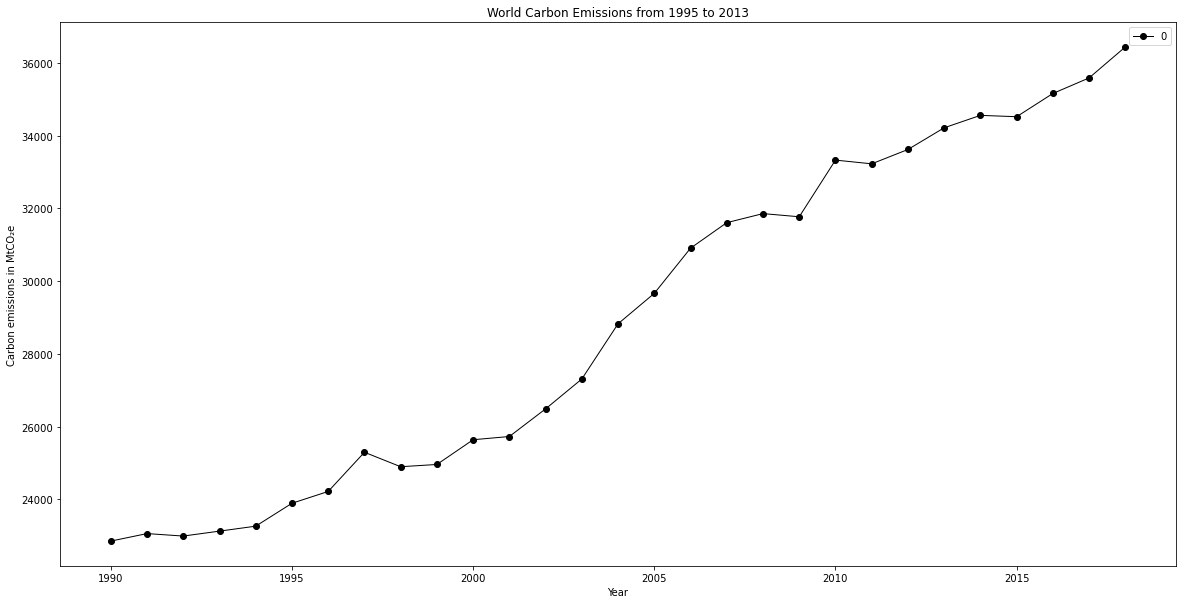

In [268]:
plt.figure (figsize = (20, 10))

#matplotlib.pyplot
W_E = world_emissions[5:]
W_E[::-1].plot(linewidth=1, color='black', marker="o")
plt.title('World Carbon Emissions from 1995 to 2013')
plt.xlabel('Year')
plt.ylabel('Carbon emissions in MtCO₂e')
plt.legend()

# Which Country has highest per Capita emissions?

In [269]:
# exclude columns which are of no use
co2_clean = carbon_dioxide_data.loc[:, ~carbon_dioxide_data.columns.isin(['Gas', 'Unit', 'Sector', 'Data source'])]

In [270]:
co2_clean.head(10)

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,36441.55,35588.70,35160.60,34521.91,34558.59,34217.18,33620.34,33226.01,33328.38,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,9663.36,9367.67,9164.21,9120.27,9184.77,9226.51,8823.05,8568.09,8138.34,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,4749.57,4581.90,4656.84,4563.52,4683.35,4670.34,4531.16,4753.12,4990.96,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),2636.99,2692.12,2669.54,2321.61,2263.78,2408.39,2482.45,2541.91,2900.69,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,2400.25,2267.16,2149.01,2085.38,2072.03,1901.98,1843.74,1695.97,1670.29,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32
5,Indonesia,1269.55,1081.11,1068.10,1574.76,1539.23,1250.27,1303.87,1285.69,773.92,...,849.42,907.96,1484.56,772.38,909.21,881.31,869.88,855.30,846.23,832.39
6,Japan,1074.08,1119.86,1139.33,1131.74,1170.11,1211.27,1202.66,1162.67,1057.96,...,1090.14,1055.50,1098.26,1110.51,1097.10,1087.22,1033.99,1041.79,1029.99,1016.89
7,Russia,1049.05,998.24,971.87,870.02,919.33,936.52,979.37,974.12,814.11,...,1081.87,1043.96,1052.50,1159.83,1190.39,1238.41,1447.33,1630.98,1766.89,1790.34
8,Brazil,812.02,834.14,826.21,741.96,768.77,744.85,713.75,679.10,1498.84,...,1339.10,1329.24,1319.99,1301.37,1279.97,1261.19,1253.64,1247.13,1243.65,1236.73
9,Germany,680.06,702.73,717.68,713.08,708.25,748.42,730.81,717.17,754.58,...,782.33,812.12,819.93,851.78,822.15,824.87,836.08,841.83,881.44,904.38


In [271]:
#create mean_emmisions column
co2_clean['mean_emmisions'] = co2_clean.mean(axis=1)

In [272]:
co2_clean.head(10)

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,mean_emmisions
0,World,36441.55,35588.70,35160.60,34521.91,34558.59,34217.18,33620.34,33226.01,33328.38,...,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92,28930.455862
1,China,9663.36,9367.67,9164.21,9120.27,9184.77,9226.51,8823.05,8568.09,8138.34,...,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96,5405.082414
2,United States,4749.57,4581.90,4656.84,4563.52,4683.35,4670.34,4531.16,4753.12,4990.96,...,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40,4900.767931
3,European Union (27),2636.99,2692.12,2669.54,2321.61,2263.78,2408.39,2482.45,2541.91,2900.69,...,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44,2946.369655
4,India,2400.25,2267.16,2149.01,2085.38,2072.03,1901.98,1843.74,1695.97,1670.29,...,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32,1192.655862
5,Indonesia,1269.55,1081.11,1068.10,1574.76,1539.23,1250.27,1303.87,1285.69,773.92,...,907.96,1484.56,772.38,909.21,881.31,869.88,855.30,846.23,832.39,1002.294138
6,Japan,1074.08,1119.86,1139.33,1131.74,1170.11,1211.27,1202.66,1162.67,1057.96,...,1055.50,1098.26,1110.51,1097.10,1087.22,1033.99,1041.79,1029.99,1016.89,1098.454138
7,Russia,1049.05,998.24,971.87,870.02,919.33,936.52,979.37,974.12,814.11,...,1043.96,1052.50,1159.83,1190.39,1238.41,1447.33,1630.98,1766.89,1790.34,1033.449310
8,Brazil,812.02,834.14,826.21,741.96,768.77,744.85,713.75,679.10,1498.84,...,1329.24,1319.99,1301.37,1279.97,1261.19,1253.64,1247.13,1243.65,1236.73,1196.710690
9,Germany,680.06,702.73,717.68,713.08,708.25,748.42,730.81,717.17,754.58,...,812.12,819.93,851.78,822.15,824.87,836.08,841.83,881.44,904.38,783.667586


In [273]:
co2_mean = co2_clean[['Country', 'mean_emmisions']]

In [274]:
co2_mean.head(10)

,Country,mean_emmisions
0,World,28930.455862
1,China,5405.082414
2,United States,4900.767931
3,European Union (27),2946.369655
4,India,1192.655862
5,Indonesia,1002.294138
6,Japan,1098.454138
7,Russia,1033.449310
8,Brazil,1196.710690
9,Germany,783.667586


In [277]:
#we need population data per country to determine per capita Co2 emmisions...
population_data = pd.read_csv("C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT/world_population_csv.csv")

In [278]:
population_data.head(5)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [279]:
#including only useful columns from df
population_data_clean = population_data[['Country', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population']]

In [280]:
population_data_clean.head(1)

,Country,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population
0,Afghanistan,41128771,38972230,33753499,28189672,19542982,10694796


In [281]:
#create a mean of populations over the years for each country
population_data_clean['mean_pop'] = population_data_clean.mean(axis=1)

In [282]:
population_data_clean.head(1)

,Country,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,mean_pop
0,Afghanistan,41128771,38972230,33753499,28189672,19542982,10694796,2.871366e+07


In [283]:
#convert mean_pop from exponential to integer
population_data_clean['mean_pop'] = population_data_clean['mean_pop'].astype('int64')

In [284]:
population_data_clean.head(10)

,Country,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,mean_pop
0,Afghanistan,41128771,38972230,33753499,28189672,19542982,10694796,28713658
1,Albania,2842321,2866849,2882481,2913399,3182021,3295066,2997022
2,Algeria,44903225,43451666,39543154,35856344,30774621,25518074,36674514
3,American Samoa,44273,46189,51368,54849,58230,47818,50454
4,Andorra,79824,77700,71746,71519,66097,53569,70075
5,Angola,35588987,33428485,28127721,23364185,16394062,11828638,24788679
6,Anguilla,15857,15585,14525,13172,11047,8316,13083
7,Antigua and Barbuda,93763,92664,89941,85695,75055,63328,83407
8,Argentina,45510318,45036032,43257065,41100123,37070774,32637657,40768661
9,Armenia,2780469,2805608,2878595,2946293,3168523,3556539,3022671


In [285]:
#including only mean_pop and country names in our population data
population_data_clean = population_data_clean[['Country','mean_pop']]

In [286]:
population_data_clean.dtypes

Country     object
mean_pop     int64
dtype: object

In [287]:
#merge data sets with co2 mean and population mean to calculate per capita emmisions
df = pd.merge(population_data_clean, co2_mean, on ='Country', how='inner')

In [288]:
df.head(10)

,Country,mean_pop,mean_emmisions
0,Afghanistan,28713658,3.060345
1,Albania,2997022,3.363103
2,Algeria,36674514,96.910690
3,Andorra,70075,0.486207
4,Angola,24788679,45.504138
5,Antigua and Barbuda,83407,0.430345
6,Argentina,40768661,209.526207
7,Armenia,3022671,5.749655
8,Australia,22292139,369.665172
9,Austria,8423633,56.563448


In [289]:
#calculate per capita emmisions
df['emmisions_per_capita'] = df['mean_emmisions']/df['mean_pop']

In [290]:
#df.tail(10)

In [291]:
#df['emmisions_per_capita'] = df['emmisions_per_capita'].astype('float64')

In [292]:
df_sorted = df.sort_values(by=['emmisions_per_capita'], ascending=[False])

In [293]:
output_df = df_sorted.head(10)
output_df

,Country,mean_pop,mean_emmisions,emmisions_per_capita
136,Qatar,1778532,43.373448,0.000024
22,Botswana,2106998,45.725172,0.000022
30,Canada,34063181,667.628966,0.000020
87,Kuwait,3181875,59.447241,0.000019
97,Luxembourg,528561,9.614138,0.000018
12,Bahrain,1125724,20.462759,0.000018
178,United Arab Emirates,6883762,122.649310,0.000018
17,Belize,317527,5.630690,0.000018
24,Brunei,384011,6.706897,0.000017
8,Australia,22292139,369.665172,0.000017


In [294]:
output_df.iloc[0,:]
#output_df.loc[136]
#Highest Emmisions per Capita: Qatar

Country                     Qatar
mean_pop                  1778532
mean_emmisions          43.373448
emmisions_per_capita     0.000024
Name: 136, dtype: object

# Which Countries are the highest contributors towards Global Warming? 

In [295]:

c02_df = pd.read_csv("C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT/historical_emissions_csv.csv")
temp = pd.read_csv("C:/Users/harsh/OneDrive/Documents/SCRIPTING FINAL PROJECT/GlobalLandTemperaturesByCity.csv")

In [296]:
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [297]:
print(temp.info())
#8.6 Million rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB
None


In [298]:
#calculating null values
nan_gtc = temp[temp['AverageTemperature'].isnull()]
nan_gtc.info()
#8.6 Million rows and 364,130 null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364130 entries, 1 to 8599211
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             364130 non-null  object 
 1   AverageTemperature             0 non-null       float64
 2   AverageTemperatureUncertainty  0 non-null       float64
 3   City                           364130 non-null  object 
 4   Country                        364130 non-null  object 
 5   Latitude                       364130 non-null  object 
 6   Longitude                      364130 non-null  object 
dtypes: float64(2), object(5)
memory usage: 22.2+ MB


In [299]:
#info after 1990
temp_1990 = temp[temp["dt"] >= "1990-01-01"]

In [300]:
temp_1990.info()
temp_1990.shape
# 1000350 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000350 entries, 2954 to 8599211
Data columns (total 7 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   dt                             1000350 non-null  object 
 1   AverageTemperature             997280 non-null   float64
 2   AverageTemperatureUncertainty  997280 non-null   float64
 3   City                           1000350 non-null  object 
 4   Country                        1000350 non-null  object 
 5   Latitude                       1000350 non-null  object 
 6   Longitude                      1000350 non-null  object 
dtypes: float64(2), object(5)
memory usage: 61.1+ MB


(1000350, 7)

In [301]:
#checking null values
temp_1990.isnull().sum()
#3070 null values

dt                                  0
AverageTemperature               3070
AverageTemperatureUncertainty    3070
City                                0
Country                             0
Latitude                            0
Longitude                           0
dtype: int64

In [302]:
#dropping rows with null values
temp_1990 = temp_1990.dropna(how='any', axis=0)
temp_1990.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [303]:
#renaming dt column
temp_1990.rename(columns={'dt' : 'Date'},inplace=True)
#converting to datetime format
temp_1990['Date'] = pd.to_datetime(temp_1990['Date'])
#creating Year column for future analysis
temp_1990['Year'] = temp_1990['Date'].dt.year

In [304]:
temp_1990.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997280 entries, 2954 to 8599210
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Date                           997280 non-null  datetime64[ns]
 1   AverageTemperature             997280 non-null  float64       
 2   AverageTemperatureUncertainty  997280 non-null  float64       
 3   City                           997280 non-null  object        
 4   Country                        997280 non-null  object        
 5   Latitude                       997280 non-null  object        
 6   Longitude                      997280 non-null  object        
 7   Year                           997280 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 68.5+ MB


In [305]:
temp_1990.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,997280.0,18.420500,9.884408,-38.447,12.65175,20.805,26.296,39.156
AverageTemperatureUncertainty,997280.0,0.356137,0.197880,0.040,0.23200,0.309,0.423,5.181
Year,997280.0,2001.343173,6.836816,1990.000,1995.00000,2001.000,2007.000,2013.000


In [306]:
c02_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      195 non-null    object 
 1   Data source  195 non-null    object 
 2   Sector       195 non-null    object 
 3   Gas          195 non-null    object 
 4   Unit         195 non-null    object 
 5   2018         195 non-null    float64
 6   2017         195 non-null    float64
 7   2016         195 non-null    float64
 8   2015         195 non-null    float64
 9   2014         195 non-null    float64
 10  2013         195 non-null    float64
 11  2012         195 non-null    float64
 12  2011         195 non-null    float64
 13  2010         195 non-null    float64
 14  2009         195 non-null    float64
 15  2008         195 non-null    float64
 16  2007         195 non-null    float64
 17  2006         195 non-null    float64
 18  2005         195 non-null    float64
 19  2004    

In [307]:
c02_df.describe()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,194.000000
mean,378.715949,370.386564,366.166564,358.048769,358.536513,356.006513,350.330000,346.323846,349.297897,333.351897,...,266.157590,266.078359,270.424872,259.915077,256.231436,249.665949,248.475744,247.420769,248.644462,248.028402
std,2722.060347,2656.756306,2624.062599,2578.461926,2582.937989,2559.773990,2510.957527,2481.296970,2485.033349,2363.491694,...,1846.768138,1843.118898,1870.838154,1791.653745,1766.707757,1719.915887,1709.447361,1698.507027,1703.334650,1693.633278
min,-8.820000,-10.150000,-10.820000,-212.220000,-213.710000,-213.110000,-203.390000,-201.170000,-6.140000,-6.450000,...,-27.250000,-27.510000,-32.400000,-38.300000,-41.950000,-45.540000,-48.040000,-52.980000,-53.980000,-53.880000
25%,4.800000,4.320000,4.395000,3.375000,3.165000,3.035000,3.135000,2.880000,3.350000,3.620000,...,2.700000,2.320000,2.230000,2.275000,2.110000,2.220000,2.175000,2.260000,2.775000,2.590000
50%,21.920000,22.310000,22.140000,18.760000,18.770000,18.700000,19.680000,19.450000,20.010000,19.240000,...,15.450000,15.510000,14.570000,14.170000,14.130000,13.830000,14.640000,14.120000,14.610000,15.295000
75%,89.770000,88.660000,87.135000,77.345000,76.875000,74.245000,76.515000,74.805000,72.515000,69.005000,...,64.065000,62.860000,64.715000,67.710000,62.015000,61.870000,59.820000,59.120000,63.080000,61.997500
max,36441.550000,35588.700000,35160.600000,34521.910000,34558.590000,34217.180000,33620.340000,33226.010000,33328.380000,31769.890000,...,24957.300000,24895.320000,25292.920000,24214.920000,23890.220000,23260.290000,23124.000000,22988.290000,23056.400000,22849.920000


In [308]:
#counting unique values in columns
#c02_df.value_counts("Data source")

In [309]:
#c02_df.value_counts("Gas")

In [310]:
#c02_df.value_counts("Sector")

In [311]:
#c02_df.value_counts("Unit")

In [312]:
#dropping columns which are of no use
c02_df.drop(["Data source", "Sector", "Unit", "Gas"], axis=1, inplace=True)

In [313]:
#ignoring rows which are not countries:
c02_df = c02_df[c02_df["Country"] != "World"]
c02_df = c02_df[c02_df["Country"] != "European Union (27)"]

In [314]:
def most_emission(c02_df):
    
    c02_df = c02_df.set_index("Country")
    
    item_list = []
    
    for col in c02_df.columns.tolist()[::-1]:
        # sort c02_df
        c02_df = c02_df.sort_values(col, ascending=False).head(10)
        # create the chart
        item = dict(args=[{"x" : [c02_df.index], "y" : [c02_df[col]] }, 
                         {"title" : "Countries with the most emissions in " + col}
                         ],
                         label=col, method="update")
        item_list.append(item)
    
    firstviz = c02_df.sort_values(c02_df.columns.tolist()[::-1][0], ascending=False).head(10)
    
    fig = px.bar(firstviz, x=firstviz.index, y=firstviz.columns.tolist()[::-1][0],
                 color_discrete_sequence=["#4ADEDE"], template="plotly_dark",
                 text_auto=True,
                 title="Countries with the most emissions in " + c02_df.columns.tolist()[::-1][0])
    # Title
    fig.update_layout(title_x=0.5)

    fig.update_layout(
            updatemenus=[
                dict(buttons=list(item_list),  

                direction="down",showactive=True,x=0.005,
                xanchor="left",y=1.4,yanchor="top") ] )
    
    return fig.show()

In [315]:
most_emission(c02_df)